In [101]:
import os
os.chdir('C:/Users/Kamar/Videos/ML_datasets/Fraud_prediction')

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df= pd.read_csv('transactions_train.csv',low_memory=True)

In [104]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrig    False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [106]:
df.shape

(6351193, 10)

In [107]:
df['type'].value_counts()

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64

In [109]:
df.drop(['nameOrig','nameDest'],axis =1, inplace=True)
df.head(4)

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1


In [110]:
df['type'] = df['type'].astype('category')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   oldbalanceOrig  float64 
 4   newbalanceOrig  float64 
 5   oldbalanceDest  float64 
 6   newbalanceDest  float64 
 7   isFraud         int64   
dtypes: category(1), float64(5), int64(2)
memory usage: 345.2 MB


In [112]:
#conversion of categorical to numerical
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

In [113]:
category_col = ['type']

In [114]:
mapping_dict ={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                        labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col]= le_name_mapping
print(mapping_dict)

{'type': {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}}


In [115]:
df.head(3)

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
import pickle

In [117]:
X = df.drop(['isFraud'], axis=1)
y = df.isFraud

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1234)

In [119]:
print(X.shape, X_test.shape, X_train.shape)

(6351193, 7) (1270239, 7) (5080954, 7)


In [120]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [121]:
classifier = CatBoostClassifier()
classifier.fit(X_train,y_train)

Learning rate set to 0.393888
0:	learn: 0.0449185	total: 1.74s	remaining: 28m 56s
1:	learn: 0.0072119	total: 3.56s	remaining: 29m 34s
2:	learn: 0.0048428	total: 5.39s	remaining: 29m 51s
3:	learn: 0.0030654	total: 7.67s	remaining: 31m 50s
4:	learn: 0.0022859	total: 10.1s	remaining: 33m 23s
5:	learn: 0.0020788	total: 12.6s	remaining: 34m 52s
6:	learn: 0.0017825	total: 14.4s	remaining: 33m 57s
7:	learn: 0.0017291	total: 15.9s	remaining: 32m 53s
8:	learn: 0.0016591	total: 17.4s	remaining: 31m 53s
9:	learn: 0.0016020	total: 18.7s	remaining: 30m 52s
10:	learn: 0.0015506	total: 20.1s	remaining: 30m 4s
11:	learn: 0.0014973	total: 21.5s	remaining: 29m 33s
12:	learn: 0.0014700	total: 23.1s	remaining: 29m 16s
13:	learn: 0.0014587	total: 25s	remaining: 29m 19s
14:	learn: 0.0014373	total: 28s	remaining: 30m 37s
15:	learn: 0.0013892	total: 29.6s	remaining: 30m 17s
16:	learn: 0.0013824	total: 31.7s	remaining: 30m 35s
17:	learn: 0.0013198	total: 35.1s	remaining: 31m 54s
18:	learn: 0.0012868	total: 37.

In [122]:
pickle.dump(classifier,open('model.pkl','wb'))

In [123]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix, f1_score,roc_curve, roc_auc_score
def perfomance_record(clf):
    pred = clf.predict(X_test) 
    print("accuracy score",(100*accuracy_score(y_test,pred)))
    print("precision score",(100*precision_score(y_test,pred)))
    print("recall score", (100*recall_score(y_test,pred)))
    print("f1 score", (100*f1_score(y_test,pred, average="micro")))
    print("confusion matrix", confusion_matrix(y_test,pred))
    fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    print("roc value",roc_auc_score_)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "r--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

accuracy score 99.97779945348867
precision score 94.4954128440367
recall score 86.77900194426442
f1 score 99.97779945348867
confusion matrix [[1268618      78]
 [    204    1339]]
roc value 0.9338642694967135


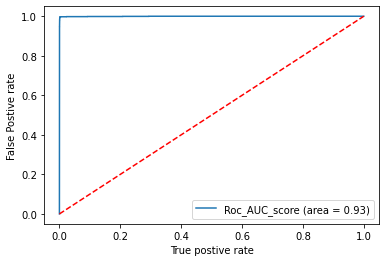

In [124]:
perfomance_record(classifier)

In [ ]:
#Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))